In [7]:
using DifferentialEquations, Plots, PlotThemes

In [8]:
set_theme(:dark)

In [3]:
include("C:/Users/mjski/Desktop/Active-Work/git-projects/scripts/scripts/orbital_elements.jl")
include("C:/Users/mjski/Desktop/Active-Work/git-projects/scripts/scripts/orbital_dynamics.jl")

diffeq_three_body_cr (generic function with 1 method)

In [9]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end

circle (generic function with 1 method)

In [63]:
function ellipse_velocity(r_apo, r_per, r_c; μ=398600)
    a_ellipse = 0.5 * (r_apo + r_per)
    v_ellipse = sqrt(2*μ) * sqrt(1/r_c - 1/(2 * a_ellipse))
    
    return v_ellipse
end

ellipse_velocity (generic function with 1 method)

In [57]:
re = 6378
r = [re+350, 0, 0]
v = [0, ellipse_velocity(re+300, re+350, re+350), 0]

get_orbital_elements(r,v)

6-element Vector{Float64}:
 6702.999999999999
    0.0037296732806207343
    0.0
  NaN
  NaN
    3.141592653589793

In [58]:
params = [6.6759e-20, 225.0, 5.974e24]
init = [
    r[1],
    r[2],
    r[3],
    v[1],
    v[2],
    v[3],
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
]

tspan = (0.0, 120.0*60.0)
sol_i = diffeq_two_body(init, tspan, params, solver=Vern7(), reltol=1e-8, abstol=1e-8);

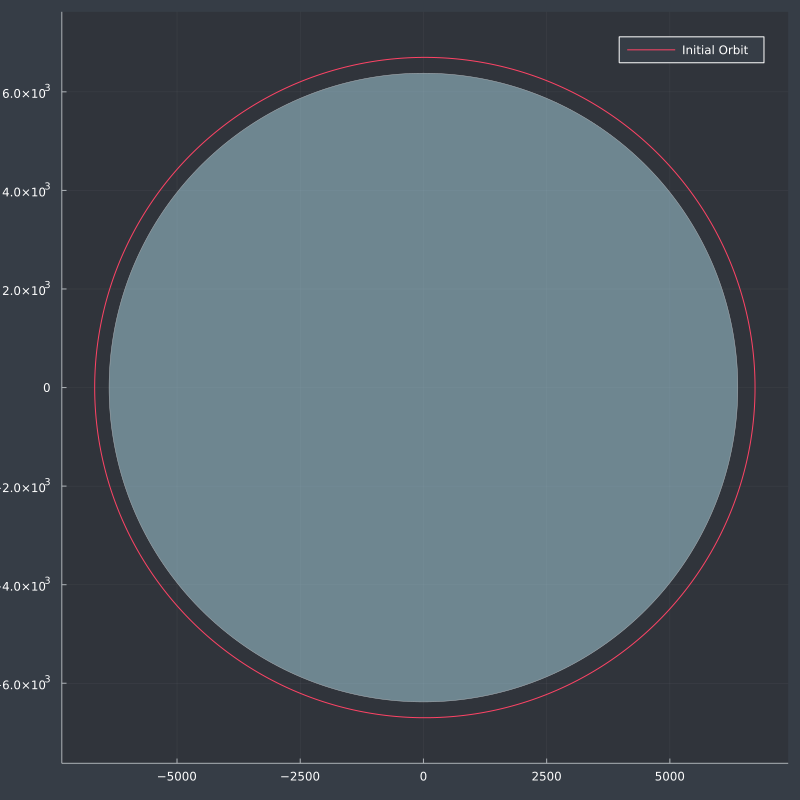

In [61]:
pl = plot(
    sol_i, 
    vars=(1,2),
    size=(800,800),
    dpi=230,
    aspect_ratio=:equal,
    label="Initial Orbit"
)

plot!(circle(0, 0, 6378), seriestype = [:shape,], lw=0.5, c = :lightblue, fillalpha=0.5, label="")

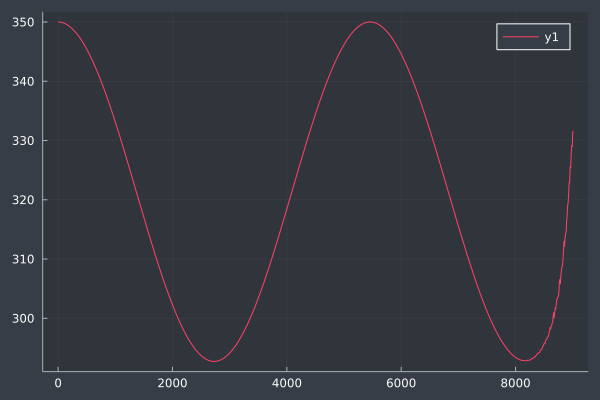

In [62]:
times = LinRange(0, 150*60, 1000)

interp_answer = sol_i(times)

x = interp_answer[1,1:end]
y = interp_answer[2,1:end]

r = sqrt.(x.^2 + y.^2)

plot(times, r .- 6378)

In [72]:
get_orbital_elements([re+450, 0, 0], [0, ellipse_velocity(re+450,re+200,re+450), 0])

6-element Vector{Float64}:
 6703.000000000001
    0.018648366403102964
    0.0
  NaN
  NaN
    3.141592653589793

In [71]:
ellipse_velocity(re+450,re+200,re+450)

7.56892524356437